In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)  # 令x变为标量
x.grad

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad  # 计算梯度

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
# 对非标量调用back需要传入一个gradient参数，该参数指定微分函数关于self的梯度
x.grad.zero_()
y = x * x
y.sum().backward()  # 等价于y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [8]:
x.grad.zero_()
y = x * x
u = y.detach()  # 返回一个新的tensor，从当前计算图中分离下来。但是仍指向原变量的存放位置，不同之处只是requirse_grad为false.
                # 得到的这个tensir永远不需要计算器梯度，不具有grad
z= u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [10]:
# 函数运算的工作流
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [11]:
a = torch.randn(size=(), requires_grad=True)  # size()表示a为标量
d = f(a)
d.backward()

In [12]:
a.grad == d/a

tensor(True)

In [13]:
x = torch.arange(4.0, requires_grad=True)
y = x ** 3
y.sum().backward()
x.grad
y.sum().backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

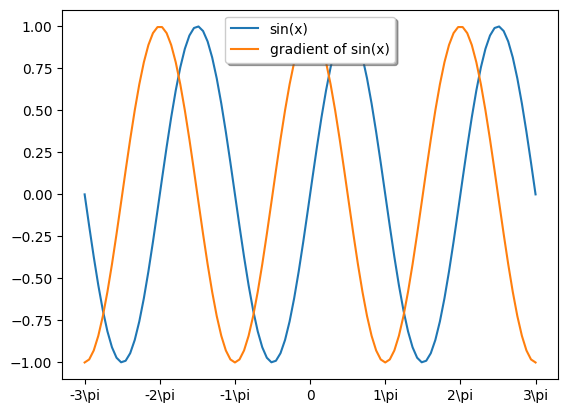

In [14]:
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

f, ax=plt.subplots(1)

x = np.linspace(-3*np.pi, 3*np.pi, 100)
x1= torch.tensor(x, requires_grad=True)
y1= torch.sin(x1)  # y = sin(x)
y1.sum().backward()  # 求和并反向传播

ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,x1.grad,label='gradient of sin(x)')
ax.legend(loc='upper center', shadow=True)

ax.xaxis.set_major_formatter(FuncFormatter(
lambda val,pos: '{:.0g}\pi'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()